<a href="https://colab.research.google.com/github/maximmillion/ConvCancer/blob/main/Dropout_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
from tqdm import tqdm

from skimage.io import imread

# Making the Dataset:

In [ ]:
# read all the images first
x_train = []
for i in range(1, 4): # changed to 3 classes
    base_dir = f'/content/drive/MyDrive/cancer_dataG/stage_{i}_png/'
    files = os.listdir(base_dir)
    for file in tqdm(files):
        img = imread(base_dir+file)
        x_train.append(img)
X_train = np.array(x_train)
X_train.shape

100%|██████████| 250/250 [00:01<00:00, 175.01it/s]


(750, 512, 512)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
NUM = 250
CLASSES = 3 #4
y_train = []
class_label = 0
for i in range(NUM * CLASSES):
    if i > 0 and i %  NUM == 0:
        class_label += 1
    y_train.append(class_label)
Y_train = np.array(y_train)

## Convert Labels to categorical:

In [ ]:
from tensorflow.keras.utils import to_categorical

print(Y_train.shape)

Y_train =to_categorical(Y_train)

print(Y_train.shape)

(750,)
(750, 3)


## Normalize dataset:

In [ ]:
from tensorflow.keras.utils import normalize

print('Maximum before: ', np.max(X_train))
print('Mean before: ', np.mean(X_train))

X_train = normalize(X_train, axis=1) # divide by 255

print('Maximum after: ', np.max(X_train))
print('Mean after: ', np.mean(X_train))

Maximum before:  255
Mean before:  44.30185897318522
Maximum after:  1.0
Mean after:  0.023893302078675856


## Splitting Data:

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train,
                                                    stratify=Y_train, 
                                                    test_size=0.2)

print(x_train.shape)
print(x_test.shape)

(600, 512, 512)
(150, 512, 512)


# Model Work:

## Making the model:

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense, Reshape

WIDTH = 512
INPUT_SHAPE = (WIDTH, WIDTH)   

model = Sequential()
model.add(Reshape((WIDTH, WIDTH, 1), input_shape=INPUT_SHAPE))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(CLASSES))
model.add(Activation('softmax'))

## Compiling the model:

In [ ]:
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Model Summary:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 512, 512, 1)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 510, 510, 32)      320       
                                                                 
 activation_5 (Activation)   (None, 510, 510, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 255, 255, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 253, 253, 32)      9248      
                                                                 
 activation_6 (Activation)   (None, 253, 253, 32)      0         
                                                      

## Training the model:

In [ ]:
history = model.fit(x_train, 
                         y_train, 
                         batch_size = 32, 
                         verbose = 1, 
                         epochs = 1,      
                         validation_data=(x_test, y_test),
                         shuffle = False)

Epoch 1/3
19/19 [==============================] - 198s 10s/step - loss: 0.6189 - accuracy: 0.7867 - val_loss: 0.0680 - val_accuracy: 0.9667
Epoch 2/3
19/19 [==============================] - 190s 10s/step - loss: 0.0824 - accuracy: 0.9833 - val_loss: 1.5491e-04 - val_accuracy: 1.0000
Epoch 3/3
19/19 [==============================] - 190s 10s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.9381e-05 - val_accuracy: 1.0000


## Visualizing Results:

### Loss:

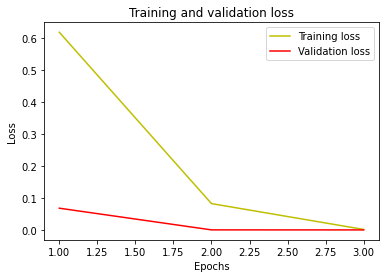

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Accuracy: 

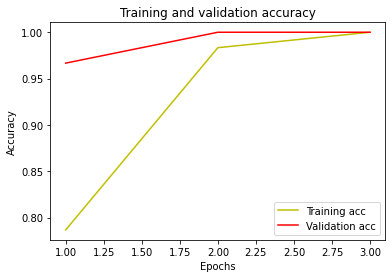

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Taking a prediction:

The prediction for this image is:  0
The actual label for this image is:  2


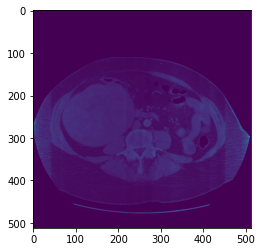

In [ ]:
n = 60  #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y)

print("The prediction for this image is: ", np.argmax(model.predict(input_img)))
print("The actual label for this image is: ", np.argmax(y_test[n])) #Stage 2